Overlap init
S= [[ 1.00000000e+00+0.j -4.95264871e-12+0.j]
 [-4.95264871e-12-0.j  1.00000000e+00+0.j]]
Fock =  [[-2.43181184e+00+0.j  1.16327683e-06+0.j]
 [ 1.14848434e-06+0.j -2.49277838e-01+0.j]]
Energy:  (-2.4318118417464345+0j) 0
mu (2.205362483469071-0j)
Energy:  (-0.24927783795396777+0j) 1
mu (0.7060847512217889-0j)


/home/qpitto/Tests_KAIN/ZORA/response/src/scfsolv.py:120: ComplexWarning: Casting complex values to real discards the imaginary part
  self.G_mu.append(vp.HelmholtzOperator(self.mra, mu, self.prec))  # Initalize the operator


Overlap init post-powerIter
S= [[ 1.        +0.j -0.01020532+0.j]
 [-0.01020532-0.j  1.        +0.j]]
orthonorm eigvals= [0.98979468 1.01020532]
Overlap init end
S= [[ 1.00000000e+00+0.j -7.18696897e-17+0.j]
 [-7.18696897e-17-0.j  1.00000000e+00+0.j]]
=============Iteration: 0
F= [[-2.43181184e+00+0.j  1.16327683e-06+0.j]
 [ 1.14848434e-06+0.j -2.49277838e-01+0.j]]
S= [[ 1.00000000e+00+0.j -7.18696897e-17+0.j]
 [-7.18696897e-17-0.j  1.00000000e+00+0.j]]
orthonorm eigvals= [1. 1.]


/home/qpitto/Tests_KAIN/ZORA/response/src/scfsolv.py:240: ComplexWarning: Casting complex values to real discards the imaginary part
  self.G_mu[orb] = vp.HelmholtzOperator(self.mra, mu, self.prec)


orthonorm eigvals= [0.99407982 1.01534946]


/home/qpitto/.conda/envs/Stdpy/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Orbital: 0    Norm: [0.99993478 0.98676858]    Update: [0.00629383 0.03176161]    Energy:[-2.45795803+0.j -0.29402912+0.j]
Orbital: 1    Norm: [0.99993478 0.98676858]    Update: [0.00629383 0.03176161]    Energy:[-2.45795803+0.j -0.29402912+0.j]
=============Iteration: 1
F= [[-2.45795803+0.j  0.0104251 +0.j]
 [ 0.01042508+0.j -0.29402912+0.j]]
S= [[1.        +0.j 0.00153389+0.j]
 [0.00153389-0.j 1.        +0.j]]
orthonorm eigvals= [0.99846611 1.00153389]
orthonorm eigvals= [0.99798209 1.00275009]
Orbital: 0    Norm: [1.00002118 1.00487228]    Update: [0.00168571 0.01594919]    Energy:[-2.45008464+0.j -0.30003372+0.j]
Orbital: 1    Norm: [1.00002118 1.00487228]    Update: [0.00168571 0.01594919]    Energy:[-2.45008464+0.j -0.30003372+0.j]
=============Iteration: 2
F= [[-2.45008464+0.j  0.0143734 +0.j]
 [ 0.01437338+0.j -0.30003372+0.j]]
S= [[ 1.0000000e+00+0.j -6.7107462e-04+0.j]
 [-6.7107462e-04-0.j  1.0000000e+00+0.j]]
orthonorm eigvals= [0.99932893 1.00067107]
orthonorm eigvals= [0.9

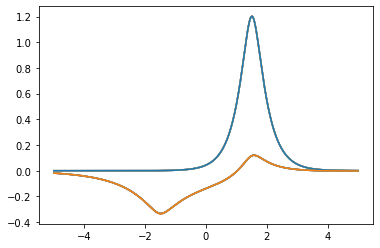

In [1]:
from vampyr import vampyr3d as vp
import numpy as np
import matplotlib.pyplot as plt
# from copy import deepcopy

# import KAIN
# import utils
from scfsolv import scfsolv as ss
from scfsolv import scfsolv_1stpert as ss1


prec = 1.0e-5
khist = 5
thrs = prec*10
# Pord = 1 #maximum pertubation order computed

# r_x = np.linspace(-16, 16, 10000) # create an evenly spaced set of points between -0.99 and 0.99
# r_y = np.linspace(-16, 16, 10000)
# r_z = np.linspace(-16, 16, 10000)
# r = [r_x, r_y, r_z]

# Electric_field = [0.01, 0., 0.]
Electric_field = [0.01, 0., 0.]
# Analytic nuclear potential
# print("pouet")
#LiH
R, Z, pathMol, nOrb = [[1.508001,  0.188973, 0.188973], [-1.508001,  0.188973, 0.188973]], [3,1], "/home/qpitto/Tests_KAIN/test_LiH/norun/orbitals/", 2 #Initial guess
# R, Z, pathMol, nOrb = [[1.508001,  0.188973, 0.188973], [-1.508001,  0.188973, 0.188973]], [3,1], "/home/qpitto/Tests_KAIN/test_LiH/run/orbitals/", 2 #LiH
#Ne
# R, Z, pathMol, nOrb = [[0.100, 0.100, 0.100]], [10], "/home/qpitto/Tests_KAIN/test_Ne/norun/orbitals/phi_p_scf_", 5 #Ne
#H2O
# R, Z, pathMol, nOrb = [[0.0000,  0.000, -0.125], [-1.4375,  0.000,  1.025], [1.4375,  0.000,  1.025]], [8,1,1], "/home/qpitto/Tests_KAIN/test_water/run/orbitals/", 5 #H2O
# R, Z, pathMol, nOrb = [[0.0000,  0.000, -0.125], [-1.4375,  0.000,  1.025], [1.4375,  0.000,  1.025]], [8,1,1], "/home/qpitto/Tests_KAIN/initial_guesses/phi_p_scf_", 5 #H2O
#CH4
# R, Z, pathMol, nOrb = [[0.1, 0.1, 0.1], [0.1, 0.1, 2.15413215], [2.03631019, 0.1, -0.5856834], [-0.54635362, 1.92524633, -0.5856834], [-0.54635362, -1.72524633, -0.5856834]], [6,1,1,1,1], "/home/qpitto/Tests_KAIN/test_CH4/norun/orbitals/", 5 #CH4

nz = len(Z)

#create scf solver instance with default MRA
Scfs = ss(prec, khist)


# tut = [[-1.514986e+00, -8.879809e-02],
# [-8.879809e-02, 1.188349e+00]]
# print(np.linalg.eig(tut))

#initialise molecule geometry and properties
Scfs.initMolec(nOrb, R, Z, pathMol)
#run the SCF solver
Scfs.scfRun(thrs, True, True)

# print("Sanity test")
# for i in range(len(Scfs.phi_prev)):
#     for j in range(len(Scfs.phi_prev)):
#         print(f"Test: {i}, {j}", vp.dot(Scfs.phi_prev[i][-1], Scfs.phi_prev[j][-1]))

# print("Start perturbation")
# Scfs_pert = ss1(Scfs)

# print("Contructor passed")
# Scfs_pert.initMolec(Electric_field)
# # Scfs_pert.print_operators()

# Scfs_pert.scfRun(thrs, True, True)